# C20: Image Data Augumentation With ImageDataGenerator

Summary:

    ImageDataGenerator class is can help you do some image data preparation or augumentation, such as:
    
        1. Feature-wise standardization.
        2. ZCA whitening.
        3. Random rotation, shiftd, shear and flips.
        4. Dimension reordering.
        5. Save augumented images to disk.
    
API document [ImageDataGenerator](https://keras.io/preprocessing/image/)

Useage:

Step1: create a ImageDataGenerator instance, meanwhile choose the augumentation method that you want

```
datagen = ImageDataGenerator(
            featurewise_center=True,
            featurewise_std_normalization=True,
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True)
```

Step2: Use train dataset to fit it, in which some statistics parameters will be calculated

```
datagen.fit(X_train)
```

Step3: Use datagen.flow() to generate a batch of dataset iteratively

```
for X_batch, Y_batch in datagen.flow(X_train, Y_train, batch_size=9):
    
    # do something you want

```
or you want to use the augumented dataset to fit a model, use model.fit_generator() instead of model.dit()

```
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=9, samples_per_epoch=len(X_train), nb_epoch=10)
```
    

## 1. Preparation

Import packages we will need

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# fix random seed
seed = 7 
np.random.seed(seed)

Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is enabled with initial size: 70.0% of memory, cuDNN 5105)
/home/liuweijie/workspace/DeepLearning/deep_learning_with_python/.env/local/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


load data

In [2]:
# load mnist data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

show some images

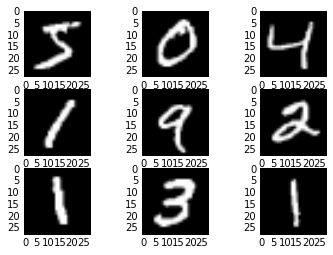

In [3]:
# show some images
for i in range(0, 9):
    plt.subplot(331 + i)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
plt.show()

## 2. Feature Standardlization

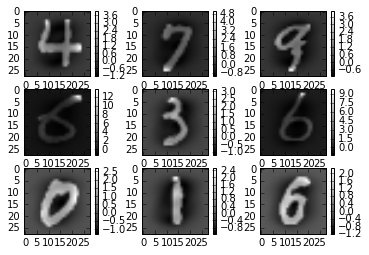

In [4]:
from keras.preprocessing.image import ImageDataGenerator

# create data generator and fit it
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(X_train)  # fit step will calculate some statistics for use

# show some standardlized images
for X_batch, Y_batch in datagen.flow(X_train, Y_train, batch_size=9):
    
    for i in range(0, 9):
        plt.subplot(331 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
        plt.colorbar()
    
    plt.show()
    break  # just show one batch of images
        


## 3. ZCA Whitening

ZCA Whitening is a linear algebra operation that reduces the rebundancy in the matrix of pixel images [1].

[1] [Alex Krizhevsky, Learning multipe layers of features from tiny images, 2009](./http://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf)

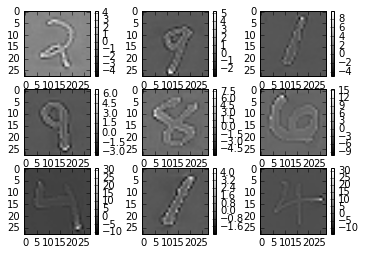

In [5]:
# create data generator and fit it
datagen = ImageDataGenerator(zca_whitening=True)
datagen.fit(X_train)  # fit step will calculate some statistics for use

# show some standardlized images
for X_batch, Y_batch in datagen.flow(X_train, Y_train, batch_size=9):
    
    for i in range(0, 9):
        plt.subplot(331 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
        plt.colorbar()
    
    plt.show()
    break  # just show one batch of images

## 4. Random Rotation

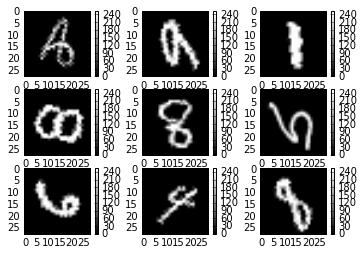

In [6]:
# create data generator and fit it
datagen = ImageDataGenerator(rotation_range=90)
datagen.fit(X_train)  # fit step will calculate some statistics for use

# show some standardlized images
for X_batch, Y_batch in datagen.flow(X_train, Y_train, batch_size=9):
    
    for i in range(0, 9):
        plt.subplot(331 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
        plt.colorbar()
    
    plt.show()
    break  # just show one batch of images

## 5. Random Shifts

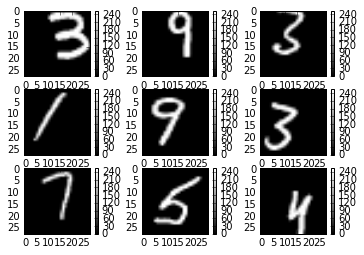

In [7]:
# create data generator and fit it
shift_rate = 0.2
datagen = ImageDataGenerator(width_shift_range=shift_rate, height_shift_range=shift_rate)
datagen.fit(X_train)  # fit step will calculate some statistics for use

# show some standardlized images
for X_batch, Y_batch in datagen.flow(X_train, Y_train, batch_size=9):
    
    for i in range(0, 9):
        plt.subplot(331 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
        plt.colorbar()
    
    plt.show()
    break  # just show one batch of images

## 6. Random Flips

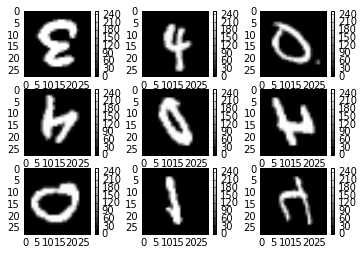

In [8]:
# create data generator and fit it
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
datagen.fit(X_train)  # fit step will calculate some statistics for use

# show some standardlized images
for X_batch, Y_batch in datagen.flow(X_train, Y_train, batch_size=9):
    
    for i in range(0, 9):
        plt.subplot(331 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
        plt.colorbar()
    
    plt.show()
    break  # just show one batch of images

## 7. Use Augumented Dataset to Train Model

In [9]:
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers.convolutional import Convolution2D, MaxPooling2D

# define a simple cnn
def create_cnn():
    model = Sequential()
    model.add(Convolution2D(32, 5, 5, border_mode='valid', input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
# build a model
model = create_cnn()

In [11]:
# create a data generator and fit it
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(X_train)

Use model.fit_generator() to fit model instead of model.fit()

In [12]:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
                    samples_per_epoch=len(X_train), nb_epoch=10)

Epoch 1/10
60000/60000 [==============================] - 6s - loss: 8141864470803.6777 - acc: 0.0640     
Epoch 2/10
60000/60000 [==============================] - 6s - loss: 122307770415.8729 - acc: 0.0693     
Epoch 3/10
60000/60000 [==============================] - 6s - loss: 33303063160.5098 - acc: 0.0680     
Epoch 4/10
60000/60000 [==============================] - 6s - loss: 9523103238.2303 - acc: 0.0685     
Epoch 5/10
60000/60000 [==============================] - 6s - loss: 2568536098.2442 - acc: 0.0701     
Epoch 6/10
60000/60000 [==============================] - 6s - loss: 867029420.5281 - acc: 0.0726     
Epoch 7/10
60000/60000 [==============================] - 6s - loss: 189287165.9492 - acc: 0.0741     
Epoch 8/10
60000/60000 [==============================] - 6s - loss: 249375190.4826 - acc: 0.0767     
Epoch 9/10
60000/60000 [==============================] - 6s - loss: 277385037.8132 - acc: 0.0872     
Epoch 10/10
60000/60000 [==============================] - 6s 

fit time cost per epoch:

    i7 6700k without gpu: 72s
    i7 6700k with gtx1080: 6.36s

## 8. Saving Augmented Images to File

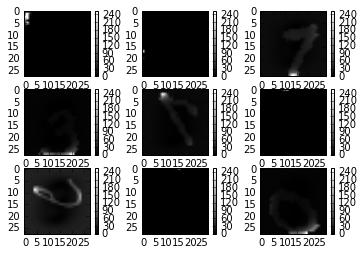

In [36]:
# only save to file when this batch are generated
for X_batch, Y_batch in datagen.flow(X_train, Y_train, batch_size=9, save_to_dir="./others/images/", 
                                     save_prefix='aug', save_format='png'):
    
    for i in range(0, 9):
        plt.subplot(331 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap='gray')
        plt.colorbar()
    
    plt.show()
    break  # just save one batch of images

The images which have been generated has been save at the "save_to_dir"

![images](./figures/c20_save_augumented_images.png)